In [26]:
from fastai.vision import *
import torch
from models.resnet_cifar import *
torch.cuda.set_device(0)

In [27]:
path = untar_data(URLs.CIFAR_100)

In [28]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, train = 'train', valid = 'test', bs = 64, size = 32, ds_tfms = tfms).normalize(cifar_stats)

In [29]:
model = resnet26_cifar(num_classes=100).cuda()
learn = Learner(data, model, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)
apply_init(learn.model, nn.init.kaiming_normal_)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


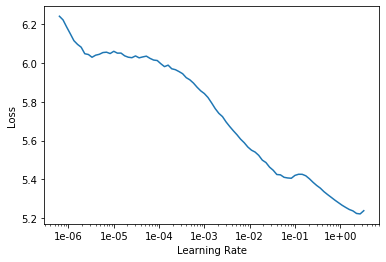

In [30]:
learn.lr_find()
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(100, max_lr = 1e-3, callbacks=[callbacks.SaveModelCallback(learn, monitor = 'accuracy', mode = 'max')])

epoch,train_loss,valid_loss,accuracy,time
0,4.519319,4.505364,0.030100,00:29
1,4.228377,4.205509,0.069500,00:31
2,4.007363,3.965616,0.108000,00:32
3,3.800716,3.811036,0.130800,00:31
4,3.663030,3.668359,0.151200,00:32
5,3.516231,3.506345,0.178300,00:32
6,3.349746,3.344771,0.202900,00:30
7,3.240151,3.228859,0.218900,00:32
8,3.120042,3.244804,0.221900,00:33
9,2.950308,3.017282,0.259400,00:31


Better model found at epoch 0 with accuracy value: 0.03009999915957451.
Better model found at epoch 1 with accuracy value: 0.06949999928474426.
Better model found at epoch 2 with accuracy value: 0.1080000028014183.
Better model found at epoch 3 with accuracy value: 0.13079999387264252.
Better model found at epoch 4 with accuracy value: 0.15119999647140503.
Better model found at epoch 5 with accuracy value: 0.17829999327659607.
Better model found at epoch 6 with accuracy value: 0.2029000073671341.
Better model found at epoch 7 with accuracy value: 0.21889999508857727.
Better model found at epoch 8 with accuracy value: 0.22190000116825104.
Better model found at epoch 9 with accuracy value: 0.25940001010894775.
Better model found at epoch 10 with accuracy value: 0.28949999809265137.
Better model found at epoch 11 with accuracy value: 0.30799999833106995.
Better model found at epoch 12 with accuracy value: 0.3199999928474426.
Better model found at epoch 13 with accuracy value: 0.3237999975

In [19]:
learn.save('resnet26_pretrained_cifar100')